# Superposición de flujos elementales

## Cuerpo de Rankine

El cuerpo de Rankine es uno de los flujos superpuestos más simples que tiene relevancia en mecánica de fluidos. Éste se obtiene al sumar un flujo uniforme y una fuente, donde las ecuaciones de un flujo uniforme en dirección $+x$ es

\begin{align}
V_x &= U_\infty \quad V_y = 0 \nonumber\\
\phi_U &= U_\infty x \quad \psi_U = U_\infty y,
\end{align}

y las de una fuente centrada en el origen, por donde sale un caudal $q$ es

\begin{align}
V_r &= \frac{q}{2\pi r}  \quad V_\theta = 0\nonumber\\
\phi_f &= \frac{q}{2\pi}\ln(r) \quad \psi_f = \frac{q}{2\pi} \theta.
\end{align}

Para sumar estos dos flujos, conviene para el flujo uniforme a coordenadas polares:

\begin{equation}
\phi_U = U_\infty r\cos(\theta) \quad \psi_U = U_\infty r\sin(\theta)
\end{equation}

y la suma da

\begin{align}
\phi_R &= \phi_U+\phi_f = U_\infty r\cos(\theta) + \frac{q}{2\pi}\ln(r)\nonumber\\
\psi_R &= \psi_U+\psi_f = U_\infty r\sin(\theta) + \frac{q}{2\pi}\theta
\end{align}



<a list of 15 text.Text objects>

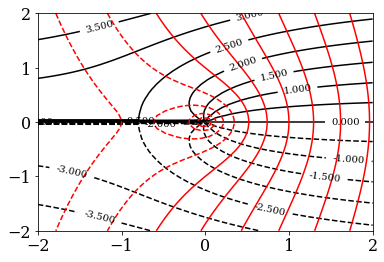

In [1]:
import numpy
from math import pi
from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

nx = 50
L = 4.0
x = numpy.linspace(-L/2,L/2,nx)
X,Y = numpy.meshgrid(x,x)

U_inf = 1.
q = 5.

r     = numpy.sqrt(X**2+Y**2)
theta = numpy.arctan2(Y,X)

psi_U = U_inf*Y 
phi_U = U_inf*X
psi_f = q/(2*pi)*theta
phi_f = q/(2*pi)*numpy.log(r)

psi = psi_U+psi_f
phi = phi_U+phi_f
#contours = numpy.arange(-3.9,3.9,0.25)
contours = numpy.arange(-5,5,0.5)

pyplot.figure()
C=pyplot.contour(X, Y, psi, contours, colors='k')
C1=pyplot.contour(X, Y, phi, contours, colors='r')
pyplot.clabel(C, inline=1, fontsize=10)
#pyplot.savefig('rankine.pdf')

El flujo parece estar dividido en dos regiones, separadas por la línea de flujo $\psi=2.5$. Esta línea de flujo contiene un punto de estancamiento sobre el eje $x$, por lo que representa una superficie sólida.

## Flujo alrededor de un cilindro

Un flujo muy interesante, y que permite modelar problemas muy cercanos a la física, aparece de la suma de un flujo uniforme y un doblete. Las ecuaciones del doblete son:

\begin{align}
V_r = -K\frac{\cos(\theta)}{r^2}\quad V_\theta = -K\frac{\sin(\theta)}{r^2}\nonumber\\
\phi_d=K\frac{\cos(\theta)}{r}\quad \psi_d = -K\frac{\sin(\theta)}{r}.
\end{align}

Sumemos estos flujos en coordenadas polares

\begin{align}
\phi_c &= \phi_U+\phi_d = U_\infty r\cos(\theta) + K\frac{\cos(\theta)}{r}\nonumber\\
\psi_c &= \psi_U+\psi_d = U_\infty r\sin(\theta) - K\frac{\sin(\theta)}{r}
\end{align}

Grafiquemos $\psi_c$ para el caso $U_\infty=1$ y $K=1$

<a list of 15 text.Text objects>

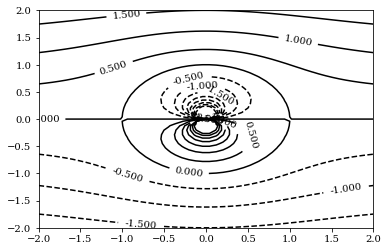

In [2]:
K= 1.
psi_d = -K*numpy.sin(theta)/r

psi_c = psi_U+psi_d
contours = numpy.arange(-4,4,0.5)

pyplot.figure()
C=pyplot.contour(X, Y, psi_c, contours, colors='k')
pyplot.clabel(C, inline=1, fontsize=10)
#pyplot.savefig('cilindro.pdf')

## Flujo alrededor de un cilindro con circulación

El flujo alrededor de un cilindro con circulación es muy parecido al caso anterior, pero ahora le agregamos un vórtice (sentido del reloj). El resultado es que el flujo será capaz de empujar el cilindro hacia arriba: produce sustentación. Este resultado es la base para el estudo de la aerodinámica y de cuerpos que sean capaces de volar.

Las ecuaciones de un vórtice que gira en el sentido del reloj son

\begin{align}
V_r &= 0 \quad V_\theta=-\frac{\Gamma}{2\pi r}\nonumber\\
\phi_v&=-\frac{\Gamma}{2\pi}\theta \quad \psi_v = \frac{\Gamma}{2\pi}\ln(r).
\end{align}

Por lo tanto, la ecuación de un cilindro con circulación es

\begin{align}
\phi_L &= \phi_U+\phi_d+\phi_v = U_\infty r\cos(\theta) + K\frac{\cos(\theta)}{r} -\frac{\Gamma}{2\pi}\theta \nonumber\\
\psi_L &= \psi_U+\psi_d+\psi_v = U_\infty r\sin(\theta) - K\frac{\sin(\theta)}{r} + \frac{\Gamma}{2\pi}\ln(r)
\end{align}

Grafiquemos $\psi_L$ para el caso $U_\infty=1$, $K=1$ y $\Gamma=5$.

<a list of 15 text.Text objects>

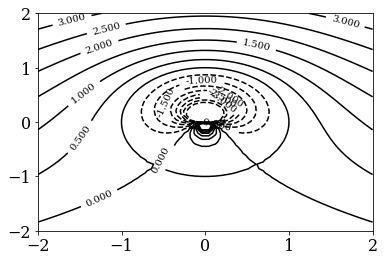

In [17]:
gamma=10
psi_v = gamma/(2*pi) * numpy.log(r)

psi_L = psi_U+psi_d+psi_v
contours = numpy.arange(-4,4,0.5)

pyplot.figure()
C=pyplot.contour(X, Y, psi_L, contours, colors='k')
pyplot.clabel(C, inline=1, fontsize=10)
#pyplot.savefig('cilindro_circ.pdf')

[-5, 5, -1, 1]

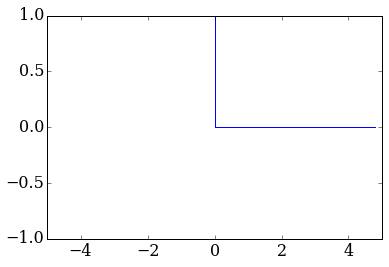

In [21]:
eta= numpy.arange(0,5,0.1)+0j
z1 = numpy.sqrt(eta**2-1)
z2 = numpy.sqrt(eta**2-1)
pyplot.plot(numpy.real(z1),numpy.imag(z1))
pyplot.plot(numpy.real(z2),numpy.imag(z2))
pyplot.axis([-5,5, -1, 1])